# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [25]:
import statistics # ADD
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

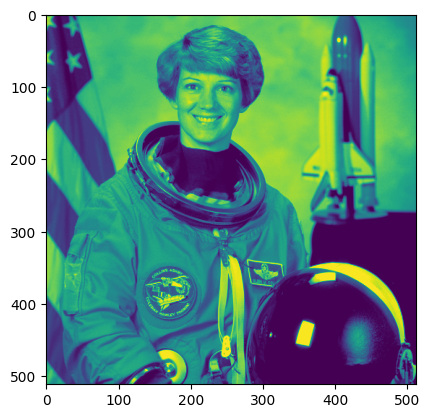

In [26]:
img = plt.imread('data/astronaut.png')
plt.imshow(img)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [27]:
# Borderproblem!!!

def meanfilter(img, size):
    result = numpy.zeros(img.shape) # creates empty img
    n = (size - 1) // 2 # size is a odd number ->
    for p in numpy.ndindex(img.shape): # p iterates over rows and colums
        if p[0] < img.shape[0] - n and p[1] < img.shape[1] - n and p[0] >= n and p[1] >= n: # 
            neighborhood_sum = 0 # introduce a new variable for the sum of the neighborhood
            for q in numpy.ndindex(size, size): # q iterates over the mean filters rows and colums
                neighborhood_sum += img[p[0] + q[0] - n,p[1] + q[1] - n] # calculate neighborhood sum
            result[p] = neighborhood_sum/(size ** 2)
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

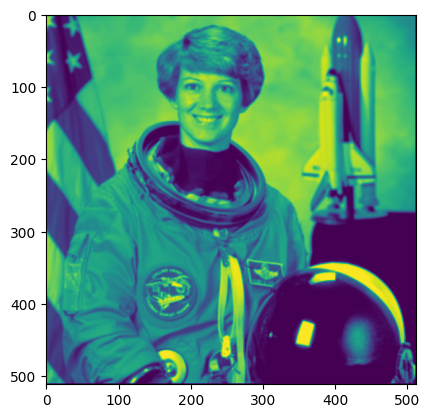

In [28]:
img3 = meanfilter(img, 3)
plt.imshow(img3)

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

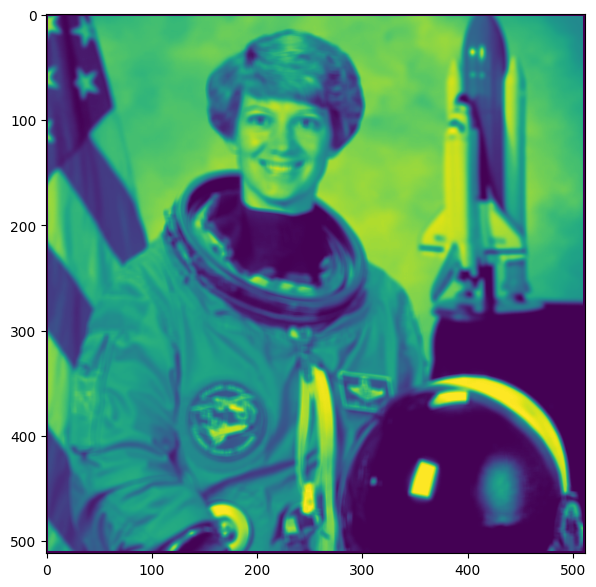

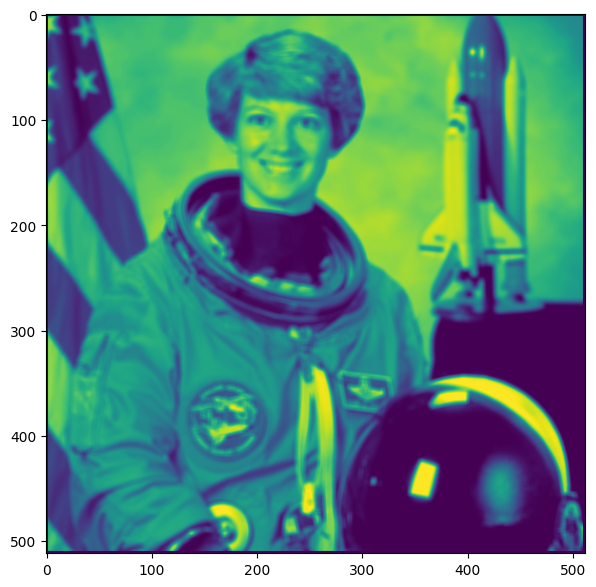

In [29]:
img5 = meanfilter(img, 5)
# filtered image
plt.figure(figsize=(10,7))
plt.imshow(img5)

# control image 
plt.figure(figsize=(10,7))
img_control = plt.imread('data/astronaut_meanfilter5.png')
plt.imshow(img_control)

# assert (img5 == img_control).all()
assert numpy.allclose(img5[10:-10, 10:-10], img_control[10:-10, 10:-10], atol=1/255)
assert numpy.allclose(img5, img_control, atol=1/255) # pixel ist geshifted Fehler bei if 

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [30]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape) # creates empty img
    n = (size - 1) // 2 # size is a odd number ->
    for p in numpy.ndindex(img.shape): # p iterates over rows and colums
        if p[0] < img.shape[0] - n and p[1] < img.shape[1] - n and p[0] > n and p[1] > n: # Border for the array / without edge pixels
            list = []
            for q in numpy.ndindex(size, size): # q iterates over the mean filters rows and colum
                list = list + [img[p[0] + q[0] - n,p[1] + q[1] - n]]
            result[p] = statistics.median(list)
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

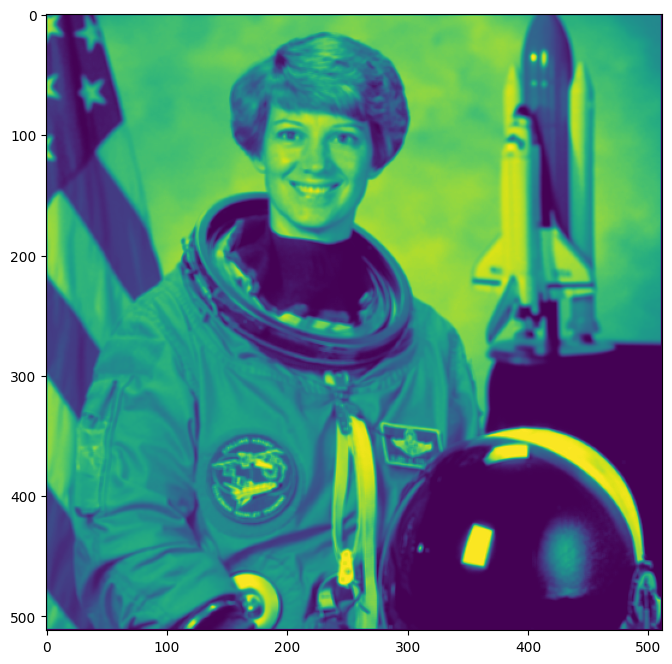

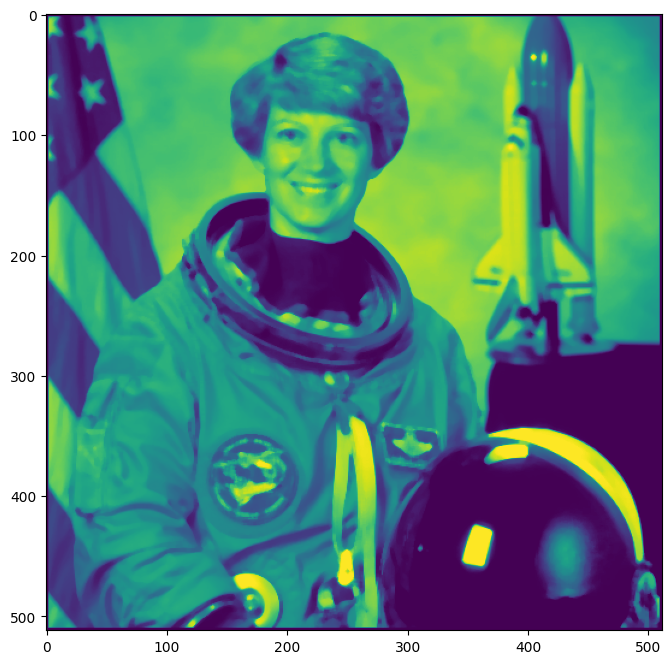

In [35]:
img_median = medianfilter(img, 3)
plt.figure(figsize=(15,8))
plt.imshow(img3)
img_control_median = plt.imread('data/astronaut_medianfilter5.png')
plt.figure(figsize=(15,8))
plt.imshow(img_control_median)

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

AssertionError: 

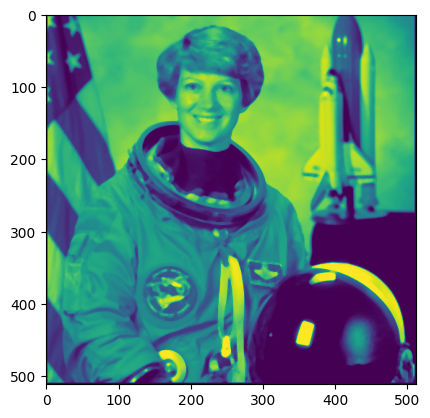

In [ ]:
assert numpy.allclose(img_median, img_control_median, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: